In [258]:
# Create an artificial binary classification problem
from sklearn.datasets import make_classification
n_classes=2
n_features=10
n_samples=500
n_informative=2
X, y = make_classification(n_samples=n_samples, n_features=n_features,
                           n_informative=n_informative, n_redundant=0,
                           n_classes=n_classes)

In [259]:
# Define the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [260]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
n_test = len(X_test)

In [261]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [262]:
# Apply the trained model to the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [263]:
# Look at metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96

In [264]:
# Look at explainability
import shap

# Since we are using random forest classifier, we can use 
# TreeExplainer, which is a fast method to estimate SHAP values
# for tree models and ensembles of trees.
explainer = shap.TreeExplainer(model)

In [265]:
shap_values = []
for i in range(len(X_test)):
    shap_values.append(explainer.shap_values(X_test[i,:]))

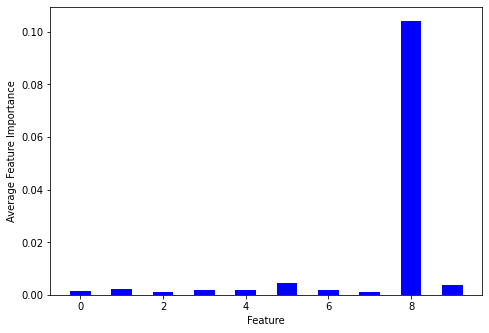

In [266]:
# Sum up feature importance across all examples
shap_across_all = []
for c in range(n_classes): # Iterate over all classes
    sums = [0] * n_features
    for i in range(n_test): # Iterate over all examples
        for j in range(n_features): # Iterate over all features
            #print(i, j)
            sums[j] += abs(shap_values[i][c][j]) # Take the absolute value
    sums = [x/n_samples for x in sums]
    shap_across_all.append(sums)        
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
feature_names = [x for x in range(n_features)]
X = np.arange(n_features)
ax.bar(X, shap_across_all[0], color = 'b', width=0.5)
ax.set_ylabel('Average Feature Importance')
ax.set_xlabel('Feature')
#ax.bar(X + 0.33, shap_across_all[1], color = 'g', width=0.33)
plt.show()

In the above figure, there should be n_informative important features, though it seems like usually there is one dominant feature.

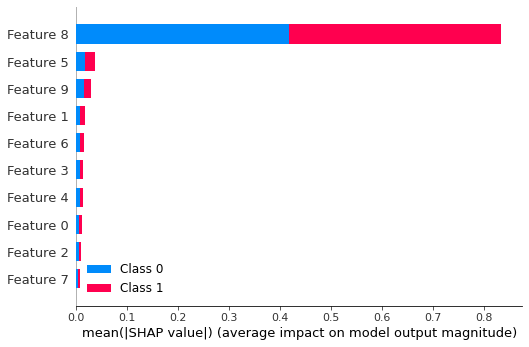

In [267]:
# Probably a simpler way of summarizing importance of features 
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [268]:
# This might work outside of jupyter
shap.plots.force(explainer.expected_value[0], 
                 shap_values[0][0],
                 X_test[0,:])